**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: Mariana Pamela Escobar Camacho

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [4]:
dfelicidad = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/happiness_report.csv')
dfelicidad

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice.

In [23]:
mexico = dfelicidad[(dfelicidad['Country or region']== 'Mexico')]
mexico.set_index('Country or region', inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

Text(6.595, 29, 'México')

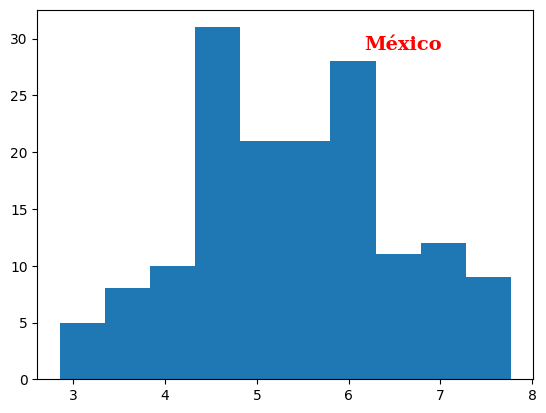

In [5]:
plt.hist('Score',data=dfelicidad)
font ={'family': 'serif',
            'size': 14,
            'weight': 'bold',
            'color': 'red',
            'horizontalalignment': 'center'}
plt.text(6.595,29,'México',fontdict=font)

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.
esperanza = dfelicidad['Country or region']['Healthy life expectancy']
plt.text('Mexico',value2,str(value2))


{'whiskers': [<matplotlib.lines.Line2D at 0x7c5896c8efb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c5896c8f520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c5896c8ee60>],
 'medians': [<matplotlib.lines.Line2D at 0x7c5896c8fa60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c5896c8fd00>],
 'means': []}

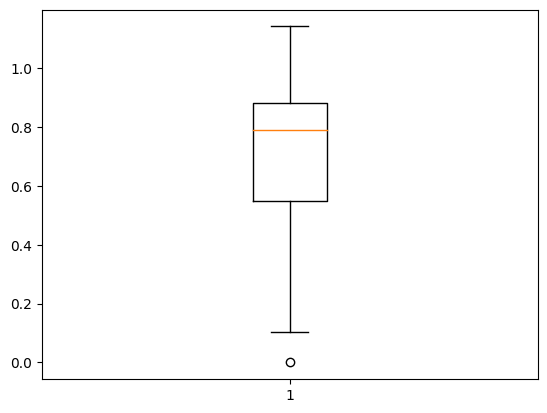

In [6]:
esperanza = dfelicidad[(dfelicidad['Country or region']== 'Mexico')]
value = esperanza['Healthy life expectancy']
value2 = np.round(value,1)
plt.boxplot(dfelicidad["Healthy life expectancy"])

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

<Axes: ylabel='Mexico'>

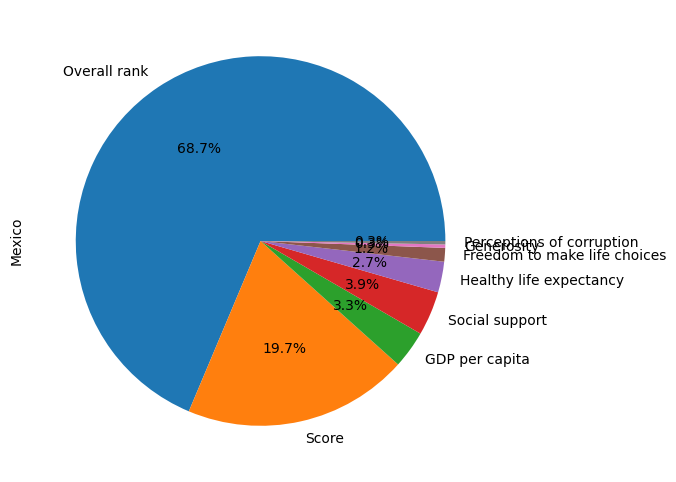

In [21]:
mexico2 = dfelicidad.loc[dfelicidad['Country or region']=='Mexico']
mexico2.set_index('Country or region', inplace=True)
mexico2.T.round(1).plot.pie(y="Mexico", figsize=(6,6), autopct='%1.1f%%',legend=False)

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

<bound method Axes.bar of <Axes: >>

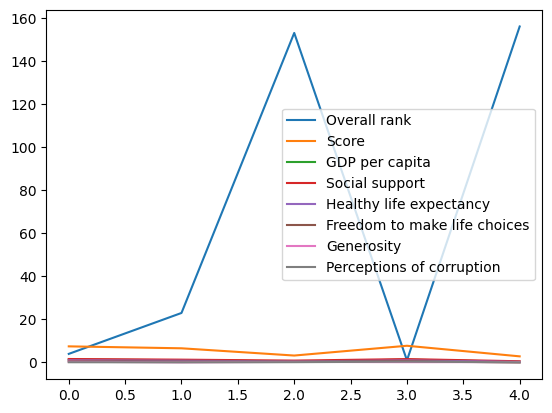

In [48]:
df1 = dfelicidad[(dfelicidad['Country or region']== 'Mexico') | (dfelicidad['Country or region']== 'Iceland') | (dfelicidad['Country or region']== 'Tanzania')]
max= dfelicidad.loc[dfelicidad["Score"] == dfelicidad["Score"].max()]
min= dfelicidad.loc[dfelicidad["Score"] == dfelicidad["Score"].min()]
df2 = pd.concat([max, min], ignore_index=True)
cincoPaises = pd.concat([df1, df2], ignore_index=True)
cincoPaises
cincoPaises.plot().bar

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región.

In [20]:
dregion = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metabase.csv')
dregion =  dregion.rename(columns={'TableName':'Country or region'})
promediofel = dfelicidad.merge(dregion, on="Country or region", how="right")
promediofel.fillna(0, inplace=True)
promediofelf = promediofel[['Region','Score']].groupby('Region').mean()
promediofelf

,Score
Region,
0,0.000000
East Asia & Pacific,1.988216
Europe & Central Asia,4.841241
Latin America & Caribbean,2.717714
Middle East & North Africa,3.838286
North America,4.723333
South Asia,3.961000
Sub-Saharan Africa,3.106250
